In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

# Set display format to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv("data/fraudTrain.csv")
df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
403844,403844,2019-07-02 00:53:25,630441765090,fraud_Kling Inc,gas_transport,47.58,Susan,Washington,F,759 Erin Mount Suite 956,May,TX,76857,31.96,-98.97,1791,Corporate investment banker,1965-07-26,eb446e58e78dfecc78bed87d78bdd1e1,1341190405,31.12,-99.55,0
154064,154064,2019-03-23 21:44:58,180094419304907,"fraud_Watsica, Haag and Considine",shopping_pos,8.41,Sharon,Smith,F,17666 David Valleys,Sun City,CA,92585,33.75,-117.17,54287,"Designer, exhibition/display",1972-09-22,47fe19127942f66175b3b419a35cf478,1332539098,34.38,-116.72,0
695728,695728,2019-10-24 03:50:07,4428154703770710,fraud_Torphy-Goyette,shopping_pos,23.43,Brittany,Guerra,F,79209 Gary Dale,Colton,WA,99113,46.59,-117.17,761,Chief Marketing Officer,1943-06-30,9098b92cc27555644a14c3c7c019f48a,1351050607,47.05,-117.90,0
329442,329442,2019-06-06 06:39:30,630425673344,fraud_Stracke-Lemke,grocery_pos,133.74,Bryan,Miller,M,411 Laurie Fords,Cass,WV,24927,38.39,-79.99,365,Special effects artist,1970-03-14,7521a425700240aa4b107c8ff46c1052,1338964770,37.95,-79.11,0
29558,29558,2019-01-18 13:14:21,4623560839669,fraud_Schroeder Group,health_fitness,10.43,Vincent,Waller,M,9379 Vanessa Run Apt. 400,Lohrville,IA,51453,42.26,-94.56,695,Administrator,1954-07-15,cb17db45dce34dea748405d4320f1e01,1326892461,42.76,-94.01,0


## Undersampling

    - Undersampling with RandomUnderSampler (easy and fast) for EDA

In [7]:
from imblearn.under_sampling import RandomUnderSampler

In [8]:
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(df.drop(columns=['is_fraud']), df['is_fraud'])

In [9]:
X["is_fraud"] = y

In [10]:
df = X

In [11]:
df.sample(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
91669,91669,2019-02-24 03:47:30,213186551511454,fraud_Goodwin-Nitzsche,grocery_pos,305.84,Cody,Dean,M,737 Thomas Wall Apt. 502,West Bethel,ME,4286,44.40,-70.86,47,Chief Operating Officer,1951-03-31,198e47d41cdaf8617841342d472f564f,1330055250,43.80,-70.66,1
625382,625382,2019-09-22 22:18:34,3534093764340240,fraud_Bode-Schuster,kids_pets,2.61,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,3ff09292059368dd5fdd6c7ba9b6c285,1348352314,45.34,-112.81,1
1248852,1248852,2020-06-04 01:46:45,3502088871723054,"fraud_Lind, Huel and McClure",gas_transport,11.25,Scott,Martin,M,31472 Cody Place Suite 740,Kensington,MD,20895,39.03,-77.08,19054,Operations geologist,1976-09-08,611b27ccc3d089b873b27f5b5e4cab4d,1370310405,39.96,-76.60,1
361966,361966,2019-06-17 08:52:23,6573561108825071,fraud_Sporer Inc,gas_transport,47.30,Kristina,Lewis,F,5449 Brandi Heights Apt. 111,Tulsa,OK,74130,36.24,-95.96,413574,Bookseller,1968-06-18,427091f39b5e45c779d2a8bec92334d1,1339923143,36.98,-96.07,0
24026,24026,2019-01-14 22:56:50,180031190491743,fraud_Altenwerth-Kilback,home,249.87,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,AL,36617,30.71,-88.09,270712,"Surveyor, land/geomatics",1972-01-05,1e09d83e4517dff629af8727408d1975,1326581810,30.73,-88.50,1


In [46]:
df.shape

(15012, 23)

In [24]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

## trans_date_trans_time vs is_fraud

In [48]:
pd.crosstab(df['trans_date_trans_time'].dt.year, df['is_fraud'])

is_fraud,0,1
trans_date_trans_time,,
2019,5342,5220
2020,2164,2286


<Axes: xlabel='is_fraud', ylabel='trans_date_trans_time'>

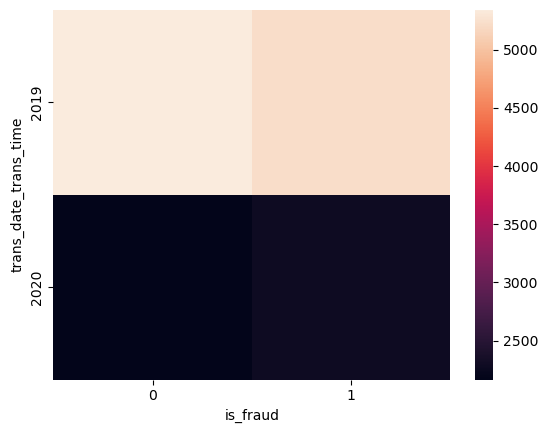

In [49]:
sns.heatmap(pd.crosstab(df['trans_date_trans_time'].dt.year,df['is_fraud']))

In [50]:
pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.month)

trans_date_trans_time,1,2,3,4,5,6,7,8,9,10,11,12
is_fraud,,,,,,,,,,,,
0,574,563,863,787,832,851,532,512,428,397,382,785
1,849,853,938,678,935,688,331,382,418,454,388,592


<Axes: xlabel='trans_date_trans_time', ylabel='is_fraud'>

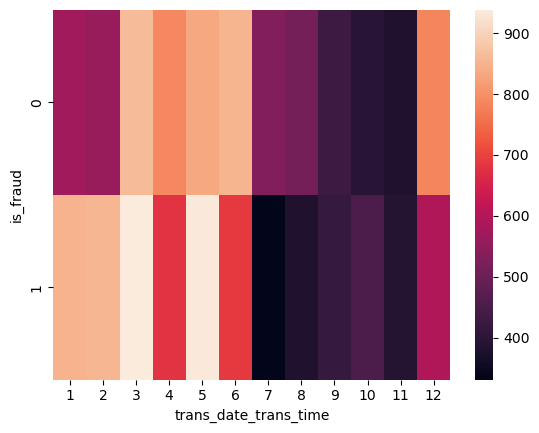

In [51]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.month))

In [52]:
pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.day)

trans_date_trans_time,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
is_fraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,272,228,252,249,230,231,267,241,284,219,258,242,269,245,256,250,258,233,255,229,249,276,259,220,197,251,227,263,203,258,135
1,209,264,269,223,177,158,242,263,177,256,310,324,242,270,240,209,277,224,305,348,221,231,234,205,262,207,205,291,257,218,188


<Axes: xlabel='trans_date_trans_time', ylabel='is_fraud'>

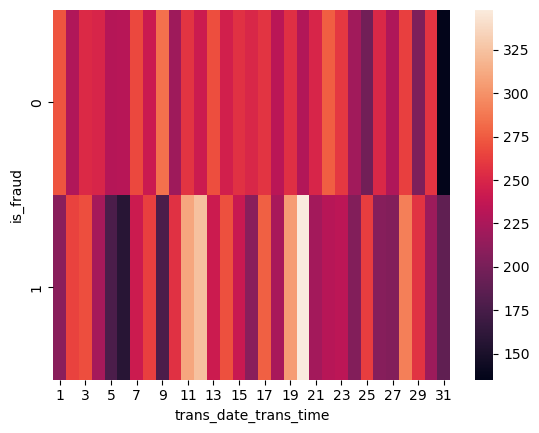

In [53]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.day))

In [54]:
pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.hour)

trans_date_trans_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
is_fraud,,,,,,,,,,,,,,,,,,,,,,,,
0,241,241,252,242,236,272,254,241,273,255,252,275,407,411,417,340,388,372,375,360,373,375,333,321
1,635,658,625,609,46,60,40,56,49,47,40,42,67,80,86,79,76,78,81,81,62,74,1931,1904


<Axes: xlabel='trans_date_trans_time', ylabel='is_fraud'>

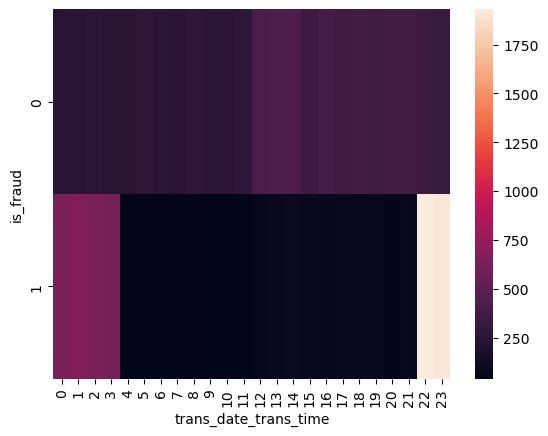

In [55]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.hour))

In [56]:
pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.minute)

trans_date_trans_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
is_fraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,130,149,126,143,113,114,118,110,140,114,145,131,131,130,127,136,118,133,116,136,127,121,122,118,124,121,127,131,133,122,126,118,110,128,128,109,124,118,122,116,111,139,122,117,145,115,114,135,132,103,138,122,127,136,122,133,113,116,138,123
1,128,107,138,113,120,133,117,113,112,127,123,125,131,121,131,115,114,135,121,135,129,115,115,148,137,112,163,132,113,114,112,119,124,118,124,133,138,148,118,122,122,122,136,117,107,124,127,125,139,132,126,114,106,109,127,131,124,144,143,138


<Axes: xlabel='trans_date_trans_time', ylabel='is_fraud'>

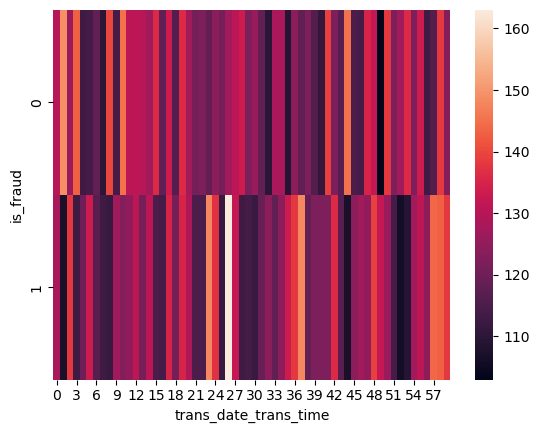

In [57]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.minute))

In [58]:
pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.second)

trans_date_trans_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
is_fraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,112,99,140,128,135,108,112,128,130,121,136,138,107,130,124,111,140,132,130,132,131,154,120,138,131,118,112,109,112,121,142,124,149,121,121,123,112,125,122,137,120,128,136,126,117,124,114,133,128,96,133,130,108,129,128,132,127,121,137,124
1,132,118,124,112,110,116,120,124,143,133,121,102,110,131,123,136,122,108,139,127,118,114,129,133,126,124,125,123,114,135,138,130,130,142,133,116,140,133,115,135,112,120,104,132,129,126,127,129,130,124,130,123,124,132,123,132,116,136,115,138


<Axes: xlabel='trans_date_trans_time', ylabel='is_fraud'>

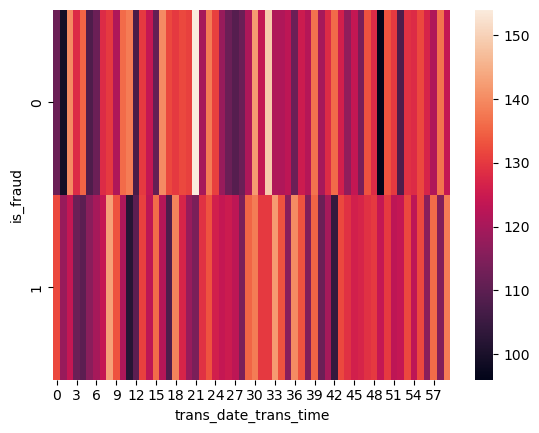

In [59]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.second))

In [60]:
pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.dayofweek)

trans_date_trans_time,0,1,2,3,4,5,6
is_fraud,,,,,,,
0,1442,951,767,807,942,1178,1419
1,1182,935,859,1008,1079,1227,1216


<Axes: xlabel='trans_date_trans_time', ylabel='is_fraud'>

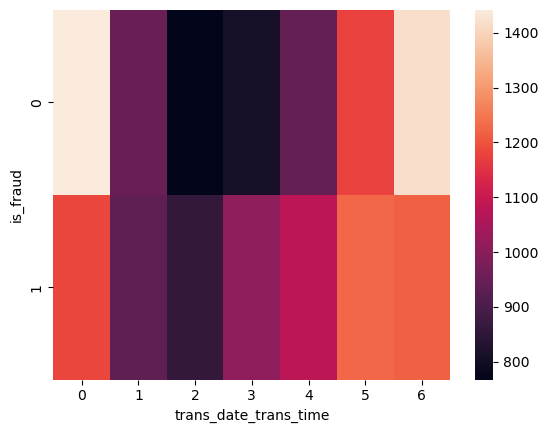

In [61]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.dayofweek))

In [62]:
pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.isocalendar().week)

week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
is_fraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,131,132,132,131,138,136,140,150,142,165,204,202,191,191,206,184,160,192,180,174,196,210,225,239,246,110,105,126,124,127,123,129,115,97,130,87,96,105,94,81,92,83,104,77,105,85,79,132,186,165,183,169
1,156,218,258,128,248,170,188,199,235,195,259,287,117,142,148,168,170,227,200,206,251,141,150,187,249,99,77,86,28,122,65,67,95,66,131,49,149,81,111,98,115,140,58,117,52,70,76,138,132,110,118,159


<Axes: xlabel='week', ylabel='is_fraud'>

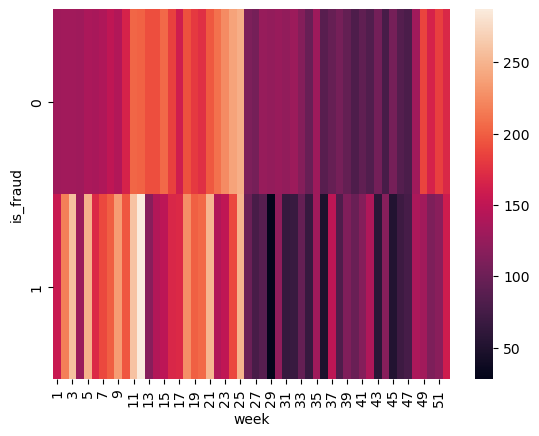

In [63]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['trans_date_trans_time'].dt.isocalendar().week))

In [64]:
df.sample()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
179541,179541,2019-04-04 00:33:59,5144043920225212,fraud_Zemlak Group,misc_net,857.34,Dakota,Fowler,M,16220 Joseph Point Suite 096,Mountain City,TN,37683,36.47,-81.81,13021,Tree surgeon,2001-07-17,1fa2b43136b9fe7f8cbc8175edb19638,1333499639,37.45,-80.93,1


## cc_num vs is_fraud

In [65]:
pd.crosstab(df['is_fraud'], df['cc_num'])

cc_num,60416207185,60422928733,60423098130,60427851591,60487002085,60490596305,60495593109,501802953619,501818133297,501828204849,501831082224,501851115094,501882822387,501894933032,501899453424,502012776709,502038091380,502049568400,503848303379,503874407318,503886119844,560881134780,561942763351,565399283797,567868110212,568279015842,571314334723,571365235126,571465035400,571844099986,573283817795,573860193545,577588686219,577891228931,580954173374,581293083266,581508178315,581686439828,583699482621,584673555952,630412733309,630423337322,630424987505,630425673344,630441765090,630451534402,630469040731,630471368021,630484879808,639023984367,639030014711,639046421587,639077309909,639095706599,675909898057,675945690716,675961917837,675990301623,676102124465,676118385837,676148621961,676173792455,676179782773,676195318214,676234256292,676245600876,676248282243,676275912597,676281772837,676292294938,676298633337,676308307625,676309913934,676314217768,676326610042,676327197445,676369110710,676372984911,4006047418382,4026222041577,4066595222529,4076173495454,4079773899158,4103158249977,4149635823017,4158008602445,4169388510116,4186530744674,4189814094741,4195740185974,4198470814557,4220345354880,4239436242473,4247921790666,4259996134423,4260128500325,4279161831637,4294930380592,4306630852918,4383521454815,4393520897625,4396682467723,4427805710168,4440581794652,4457486401506,4464457352619,4471568287204,4476840372112,4481131401752,4500002361389,4505383113689,4538566639857,4561546772499,4561892980175,4562827002127,4585132874641,4586260469584,4593569795412,4598025465633,4600155880464,4601636330889,4605902936394,4613314721966,4623560839669,4629125581019,4640395708703,4642894980163,4658117080136,4681699462969,4683638447911,4687263141103,4745996322265,4748866581408,4755696071492,4760122961662,4783226709001,4788103653396,4806443445305,4807552641361,4809701904914,4844243189971,4862293128558,4900628639996,4917226033950,4957924165498,4975457191020,4981132848794,4988304376504,4990494243023,30011465039817,30026790933302,30029052116970,30030380240193,30033162392091,30042378430132,30044330818990,30074693890476,30082025922891,30092964733035,30103132002433,30118423745458,30131826429364,30135235368675,30143535920989,30143713661454,30150717898388,30153452207526,30175986190993,30181367542315,30197398657930,30199621383748,30230540139182,30234966027947,30235268718158,30235438713303,30238755902988,30242921189660,30248898834493,30263540414123,30266994494236,30270432095985,30273037698427,30290551782700,30328384440870,30343344410970,30344654314976,30357372465631,30360260465747,30364087349027,30371006069917,30373802285317,30376238035123,30404291151692,30407675418785,30408301059761,30427035050508,30428204673351,30434173205605,30442439074871,30446018552504,30487648872433,30491348102802,30499715231997,30501624614310,30510856607165,30518206766474,30541100351706,30546453310167,30551643947183,30560609640617,30561214688470,30570197515105,30596478689301,36078114201167,36153880429415,36192615525683,36360452125889,36485887555770,36581538659449,36721445180895,36722699017270,36890292963032,36913587729122,38014427445058,38052002992326,38057513087029,38199021865320,38295635583927,38530489946071,38534201672254,38544312728630,38580485618059,38588538868506,38797410705641,38817501916673,38859492057661,38947654498698,180011453250192,180014262259255,180017442990269,180018375329178,180031190491743,180036456789979,180038493344495,180040027502291,180040131978916,180042946491150,180046165512893,180046617132290,180046765320457,180047222886866,180048185037117,180049032966888,180056173248083,180058696935600,180064817343047,180065479077096,180067151859700,180067784565096,180068353086472,180069253480336,180072527505094,180081032825079,180084576295055,180084695172649,180094419304907,180094608895855,180097223252063,213102873001603,213107169859697,213112402583773,213113028819344,213113338379864,213114122496591,213120463918358,213124978348176,213125815021702,213126662687660,213136802746375,

<Axes: xlabel='cc_num', ylabel='is_fraud'>

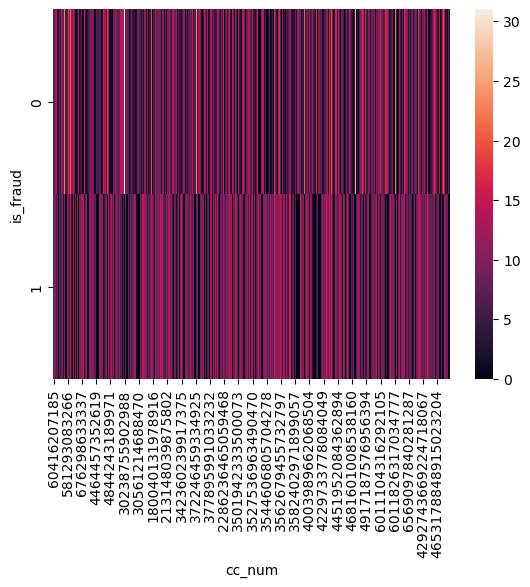

In [66]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['cc_num']))

## merchant vs is_fraud

In [67]:
pd.crosstab(df['is_fraud'], df['merchant'])

merchant,fraud_Abbott-Rogahn,fraud_Abbott-Steuber,fraud_Abernathy and Sons,fraud_Abshire PLC,"fraud_Adams, Kovacek and Kuhlman",fraud_Adams-Barrows,"fraud_Altenwerth, Cartwright and Koss",fraud_Altenwerth-Kilback,fraud_Ankunding LLC,fraud_Ankunding-Carroll,"fraud_Armstrong, Walter and Gottlieb",fraud_Auer LLC,fraud_Auer-Mosciski,fraud_Auer-West,fraud_Bahringer Group,"fraud_Bahringer, Bergnaum and Quitzon","fraud_Bahringer, Osinski and Block","fraud_Bahringer, Schoen and Corkery",fraud_Bahringer-Larson,fraud_Bahringer-Streich,fraud_Bailey-Morar,fraud_Balistreri-Nader,fraud_Barrows PLC,fraud_Bartoletti and Sons,fraud_Bartoletti-Wunsch,fraud_Barton Inc,fraud_Barton LLC,fraud_Bashirian Group,fraud_Bauch-Blanda,fraud_Bauch-Raynor,fraud_Baumbach Ltd,"fraud_Baumbach, Feeney and Morar","fraud_Baumbach, Hodkiewicz and Walsh","fraud_Baumbach, Strosin and Nicolas",fraud_Bechtelar-Rippin,"fraud_Becker, Harris and Harvey",fraud_Bednar Group,fraud_Bednar Inc,fraud_Bednar PLC,fraud_Beer-Jast,fraud_Beier LLC,fraud_Beier and Sons,fraud_Beier-Hyatt,fraud_Berge LLC,"fraud_Berge, Kautzer and Harris",fraud_Berge-Hills,fraud_Berge-Ullrich,fraud_Bernhard Inc,"fraud_Bernhard, Grant and Langworth",fraud_Bernhard-Lesch,fraud_Bernier and Sons,"fraud_Bernier, Streich and Jewess","fraud_Bernier, Volkman and Hoeger","fraud_Bins, Balistreri and Beatty",fraud_Bins-Howell,fraud_Bins-Rice,fraud_Bins-Tillman,fraud_Block Group,fraud_Block-Hauck,fraud_Block-Parisian,fraud_Bode-Rempel,fraud_Bode-Schuster,"fraud_Boehm, Block and Jakubowski","fraud_Boehm, Predovic and Reinger",fraud_Bogisich Inc,fraud_Bogisich-Homenick,fraud_Bogisich-Weimann,fraud_Botsford Ltd,fraud_Botsford PLC,fraud_Botsford and Sons,fraud_Boyer PLC,fraud_Boyer-Haley,fraud_Boyer-Reichert,fraud_Bradtke PLC,"fraud_Bradtke, Torp and Bahringer",fraud_Breitenberg LLC,fraud_Breitenberg-Hermiston,fraud_Brekke and Sons,fraud_Brown Inc,fraud_Brown PLC,"fraud_Brown, Homenick and Lesch",fraud_Brown-Greenholt,fraud_Bruen-Yost,fraud_Buckridge PLC,fraud_Carroll PLC,fraud_Cartwright PLC,fraud_Cartwright-Harris,"fraud_Casper, Hand and Zulauf",fraud_Cassin-Harvey,fraud_Champlin and Sons,"fraud_Champlin, Rolfson and Connelly",fraud_Champlin-Casper,"fraud_Christiansen, Goyette and Schamberger",fraud_Christiansen-Gusikowski,fraud_Cole PLC,"fraud_Cole, Hills and Jewess",fraud_Collier Inc,fraud_Collier LLC,fraud_Connelly PLC,"fraud_Connelly, Reichert and Fritsch",fraud_Connelly-Carter,fraud_Conroy Ltd,"fraud_Conroy, Balistreri and Gorczany",fraud_Conroy-Cruickshank,fraud_Conroy-Emard,fraud_Cormier LLC,"fraud_Cormier, Stracke and Thiel",fraud_Corwin-Collins,fraud_Corwin-Gorczany,fraud_Corwin-Romaguera,"fraud_Cremin, Hamill and Reichel","fraud_Crist, Jakubowski and Littel",fraud_Crona and Sons,"fraud_Cronin, Kshlerin and Weber",fraud_Crooks and Sons,fraud_Cruickshank-Mills,fraud_Cummerata-Hilpert,fraud_Cummerata-Jones,fraud_Cummings Group,fraud_Cummings LLC,fraud_Dach-Borer,fraud_Dach-Nader,"fraud_Dare, Casper and Bartoletti","fraud_Dare, Fritsch and Zboncak",fraud_Dare-Gibson,fraud_Dare-Marvin,fraud_Daugherty LLC,"fraud_Daugherty, Pouros and Beahan",fraud_Daugherty-Thompson,fraud_Deckow-Dare,fraud_Deckow-O'Conner,fraud_Denesik and Sons,"fraud_Denesik, Powlowski and Pouros",fraud_Dibbert and Sons,fraud_Dibbert-Green,fraud_Dicki Ltd,fraud_Dickinson Ltd,fraud_Dickinson-Rempel,fraud_Dietrich-Fadel,fraud_Donnelly LLC,fraud_Donnelly PLC,fraud_Dooley Inc,fraud_Dooley-Thompson,"fraud_Douglas, DuBuque and McKenzie","fraud_Douglas, Schneider and Turner",fraud_Douglas-White,fraud_Doyle Ltd,fraud_DuBuque LLC,"fraud_Durgan, Gislason and Spencer",fraud_Durgan-Auer,fraud_Ebert-Daugherty,fraud_Effertz LLC,"fraud_Effertz, Welch and Schowalter","fraud_Eichmann, Bogan and Rodriguez","fraud_Eichmann, Hayes and Treutel",fraud_Eichmann-Kilback,fraud_Eichmann-Russel,fraud_Emard Inc,fraud_Emmerich-Luettgen,fraud_Emmerich-Rau,fraud_Erdman-Durgan,fraud_Erdman-Ebert,fraud_Erdman-Kertzmann,fraud_Erdman-Schaden,fraud_Ernser-Feest,fraud_Ernser-Lynch

<Axes: xlabel='merchant', ylabel='is_fraud'>

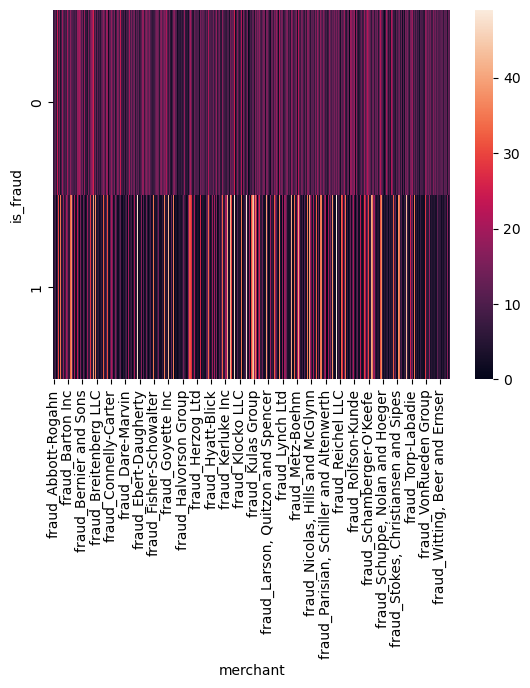

In [68]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['merchant']))

In [72]:
df.sample()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1211454,1211454,2020-05-21 17:37:54,3502377050801561,fraud_Hills-Boyer,personal_care,3.02,Kathleen,Martin,F,659 Nicole Cove Suite 560,New Waverly,TX,77358,30.54,-95.45,4993,"Scientist, biomedical",1948-11-30,bb37861417778a3d38fa238c43514a86,1369157874,30.08,-94.87,0


## category vs is_fraud

In [73]:
pd.crosstab(df['is_fraud'], df['category'])

category,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
is_fraud,,,,,,,,,,,,,,
0,493,507,775,259,751,483,734,642,360,490,563,593,625,231
1,233,151,618,134,1743,133,198,239,915,250,220,1713,843,116


<Axes: xlabel='category', ylabel='is_fraud'>

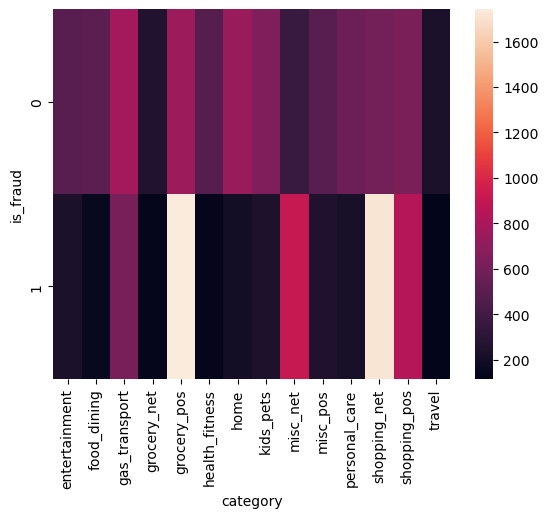

In [74]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['category']))

## amt vs is_fraud

<Axes: xlabel='is_fraud', ylabel='amt'>

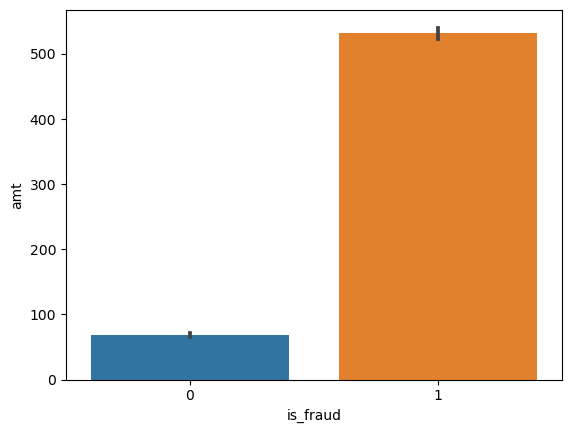

In [76]:
sns.barplot(x='is_fraud', y='amt', data=df)

<Axes: xlabel='is_fraud', ylabel='amt'>

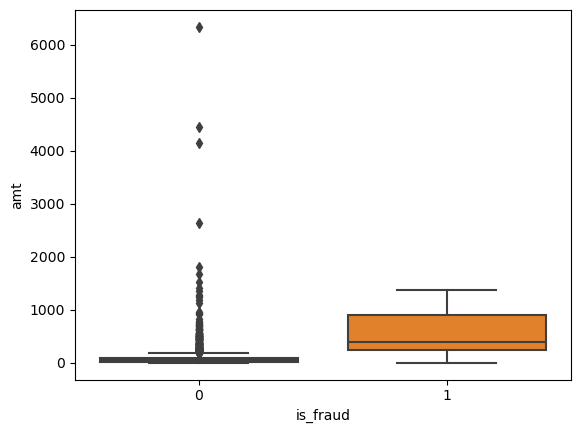

In [77]:
sns.boxplot(x='is_fraud', y='amt', data=df)

In [78]:
df.sample()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
177234,177234,2019-04-02 15:24:26,3586008444788268,"fraud_Ledner, Hartmann and Feest",health_fitness,22.29,Crystal,Fuller,F,000 Jennifer Mills,Issaquah,WA,98027,47.50,-122.01,50489,Osteopath,1984-02-29,760e0152718d0ce10d15d69b83274b19,1333380266,47.85,-122.03,0


## first, last vs is_fraud

In [79]:
s = df['first'] + df['last']

In [80]:
pd.crosstab(df['is_fraud'], s)

col_0,AaronMurray,AaronPena,AaronRogers,AaronStewart,AdamKeller,AdamKirk,AdamMcdonald,AdamRiddle,AdamSantos,AdamStark,AdrianaHarvey,AlanColon,AlanHoward,AlanParsons,AlanTaylor,AlexSingh,AlexWhite,AliceKemp,AliciaBishop,AliciaHawkins,AliciaMiller,AliciaMitchell,AliciaMorales,AllenBell,AllisonAllen,AllisonAyala,AlyssaMorgan,AmandaAdams,AmandaAlexander,AmandaFitzgerald,AmandaGomez,AmandaJones,AmandaMolina,AmandaSmith,AmandaSpencer,AmandaVance,AmandaWheeler,AmandaWilliams,AmberLewis,AmberPerez,AmberThornton,AmyAbbott,AmyDaugherty,AmyFlynn,AmyGarrett,AnaHowell,AnaMccormick,AndreaCruz,AndreaLewis,AndreaPerkins,AndrewMcgee,AndrewPatterson,AndrewTucker,AngelaEdwards,AngelaHodges,AngelaRoss,AngelaTaylor,AngelaWest,AngelaWhite,AngelicaLopez,AngieJones,AnnLawson,AnnaLogan,AnthonyAllen,AnthonyRoberts,AnthonyVelasquez,AntonioKoch,AprilJohnson,ArianaCampbell,ArthurWells,AshleeLong,AshleyBlanchard,AshleyCabrera,AshleyCruz,AshleyLopez,AshleyMcdonald,AshleyRobinson,AshleyWhitehead,AshleyWhitney,AudreyGonzalez,AudreyHickman,AudreyMartinez,AustinPhillips,BarbaraLowe,BarbaraNelson,BarbaraNorman,BarbaraTaylor,BeckyMckinney,BelindaJimenez,BenjaminBeck,BenjaminHarris,BenjaminKim,BenjaminMartin,BenjaminRobinson,BenjaminRogers,BethLambert,BethanyAndrade,BiancaNovak,BiancaScott,BillLane,BillyGallagher,BillyMcdonald,BobbySmith,BradleyAdkins,BradleyAnderson,BradleyMartinez,BrandonBridges,BrandonPittman,BrandyJohnson,BrandyQuinn,BreannaRodriguez,BrendaJohnson,BrendaNorris,BrendaPerez,BrentTerrell,BrianHogan,BrianPerez,BrianRay,BrianSimpson,BrianWilliams,BrianaSantos,BriannaFoley,BriannaPage,BriannaWilson,BridgetBowen,BrittanyCox,BrittanyGuerra,BrittanyMccarthy,BrookeFisher,BrookeRodriguez,BrookeSmith,BryanGill,BryanMiller,BryanPugh,BryanTorres,BryceJoseph,CalvinMolina,CameronJohns,CandiceBrown,CarlHernandez,CarlosChung,CarolDillon,CarolynPerez,CarolynThomas,CarrieLewis,CarrieWashington,CaseyHowell,CassandraNunez,CassandraSanders,CatherineWeber,CesarSmith,CharlesCarrillo,CharlesCopeland,CharlesMoreno,CharlesPreston,CharlesRobles,CharlesRodriguez,ChelseaSilva,CherylBallard,CherylMelton,CherylMorgan,ChrisDaniel,ChrisDixon,ChrisWhite,ChristianJohns,ChristianRoman,ChristieMendoza,ChristieWilliamson,ChristinaEaton,ChristinaMoore,ChristinaNelson,ChristinaNorris,ChristinaRose,ChristineBest,ChristineBurns,ChristineDavis,ChristineHarris,ChristineJohnson,ChristineJones,ChristineLeblanc,ChristineShaffer,ChristopherAdkins,ChristopherCarr,ChristopherCastaneda,ChristopherChoi,ChristopherContreras,ChristopherCummings,ChristopherFarrell,ChristopherGilbert,ChristopherGomez,ChristopherGregory,ChristopherGrimes,ChristopherHenry,ChristopherHolt,ChristopherHorn,ChristopherJohnson,ChristopherLuna,ChristopherMatthews,ChristopherMiller,ChristopherOdom,ChristopherOrtega,ChristopherPatterson,ChristopherRaymond,ChristopherRodgers,ChristopherSheppard,ChristopherWhite,ChristopherWilson,ClaireDavis,CodyBlake,CodyDean,CodyHooper,CodyMiller,ColleenMorris,CollinBrown,ConnieCarroll,ConnorGrant,CoreyJones,CoryThomas,CraigDunn,CraigFranco,CristianJones,CrystalFuller,CrystalGamble,CurtisYoung,CynthiaDavis,DakotaFowler,DakotaMaldonado,DaleSmith,DaltonJones,DanielBoyd,DanielBriggs,DanielCain,DanielEscobar,DanielGraham,DanielHernandez,DanielJones,DanielMartinez,DanielMelton,DanielOwens,DanielleEvans,DanielleHayden,DanielleSchaefer,DanielleWalker,DanielleYu,DavidBonilla,DavidCampbell,DavidCole,DavidErickson,DavidEverett,DavidHughes,DavidKirby,DavidLewis,DavidMiller,DavidNichols,DavidPeterson,DavidRodriguez,DavidRogers,DavidSantiago,DavidSerrano,DavidThomas,DavidVasquez,DavidWhite,DavidWolfe,DawnCox,DawnGray,DawnStephens,DawnTucker,DeannaWarren,DebbieHughes,DebbiePayne,DeborahFisher,DebraBecker,DebraEaton,DebraStark,DeniseBarnett,DennisJones,DerekBentley,DerekJones,DerrickFlores,DerrickGeorge,DestinyLowe,DianaJacobs,DianaRodgers,DianeJackson,DianeSmith,DonaldEvans,DonnaDavis,DonnaMoreno,DorothyThomas,DorothyZuniga,DouglasSmith,DouglasWillis,DrewGarcia,DustinRoberts,DwayneMartinez,DylanBonilla,Dyla

<Axes: xlabel='col_0', ylabel='is_fraud'>

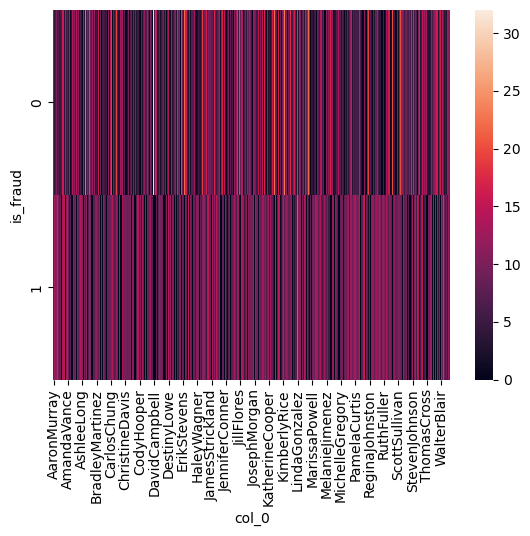

In [81]:
sns.heatmap(pd.crosstab(df['is_fraud'], s))

In [82]:
df.sample()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
303978,303978,2019-05-27 16:46:32,3525668150756629,"fraud_Hyatt, Russel and Gleichner",health_fitness,78.46,Christopher,Choi,M,04611 Sandra Spring Suite 059,Rumely,MI,49826,46.35,-87.04,137,Film/video editor,1990-08-13,f7865b2b6d0205a1dbe2e4401c930e36,1338137192,46.01,-86.06,0


## gender vs is_fraud

In [83]:
pd.crosstab(df['is_fraud'], df['gender'])

gender,F,M
is_fraud,,
0,4100,3406
1,3735,3771


<Axes: xlabel='gender', ylabel='is_fraud'>

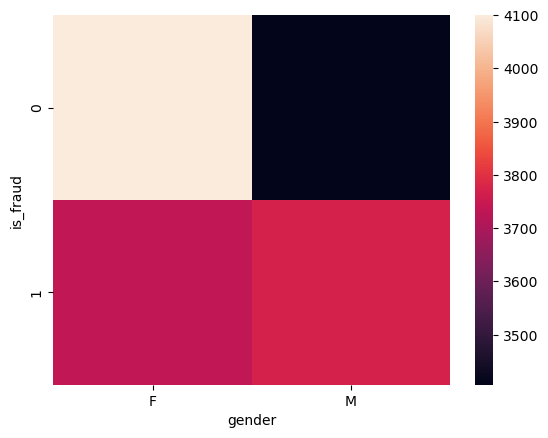

In [84]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['gender']))

## street vs is_fraud

In [5]:
pd.crosstab(df['is_fraud'], df['street'])

street,000 Jennifer Mills,0005 Morrison Land,00315 Ashley Valleys,00378 Sarah Burgs Suite 106,0043 Henry Plaza,005 Cody Estates,0069 Robin Brooks Apt. 695,00821 Joanna Meadow,010 Salazar Walk,010 Weaver Land,0107 Clements Point,0110 Ashley Forest,01479 Murray Circle,01505 Amy Stravenue,0157 Samuel Mission Suite 379,01770 Kevin Lodge Suite 190,0182 Owens Burgs Suite 480,0189 Emily Prairie,01892 Patricia Vista Apt. 828,019 Kimberly Light Apt. 039,02018 Gary Key Apt. 911,0207 Griffith Plains Apt. 544,02110 Lucas Freeway Suite 517,022 Moore Island,024 Williams Parkway,025 White Fork Apt. 633,030 Seth Divide Suite 355,03030 White Lakes,03090 Fisher Forges Apt. 200,033 Tara Brook Suite 523,03368 Michelle Trail,034 Kimberly Mountains,03512 Jackson Ports,0356 Sarah Light,0362 Anderson Wall,0371 Aimee Neck Suite 856,0374 Courtney Islands Apt. 400,03921 Cole Mission Suite 882,04139 Johnson Prairie Suite 401,0423 Kirby Field Suite 623,043 Hanson Turnpike,046 Michelle Fort Suite 314,04611 Sandra Spring Suite 059,0467 Jerry Pines Apt. 640,047 Kevin Haven,0495 Baker Manors,04975 Allison Shoal,05050 Rogers Well Apt. 439,053 Kim Valley Suite 928,0537 Margaret Common Suite 526,0547 Russell Ford Suite 574,055 Stephanie Turnpike Suite 559,05561 Farrell Crescent,05597 Michael Spurs,056 Anthony Creek Suite 406,057 Martinez Radial,0582 Williams Isle Apt. 039,0611 Stafford Valley Suite 504,062 Carl Dam,062 Poole Hollow Apt. 815,0638 Fred Ramp Suite 086,06393 Nancy Parkways Suite 855,065 Jones Stravenue,06539 Gregory Mountains Suite 029,0654 Kevin Turnpike Apt. 084,0665 Lisa Alley,06730 Joshua Isle Suite 555,06808 Ryan Valleys,0688 Kevin Manor,06959 Stephen Branch Suite 246,0701 John Ranch,071 Wise Trace,07177 William Dale Apt. 547,07712 Marcus Divide Apt. 831,078 Alex Fields,079 Chelsea Rest,07943 Davis River,08056 Alvarado Club Suite 699,082 Hernandez Bypass Apt. 886,08236 Kim Hill,083 Karen Island Apt. 656,084 Holmes Avenue Suite 206,08580 Jeremy Falls,086 Pierce Cove,0881 Lori Pines,08932 Bonnie Stravenue,08966 Beltran Route Suite 905,0900 Beverly Landing,0912 Mark Fields Apt. 080,0925 Lang Extensions,094 Owens Underpass,09419 Lewis Rapids,0947 Kelly Courts,0953 David Skyway,098 Stewart Hill,0984 Amanda Corners Apt. 297,1004 Willis Pass,1007 Colton Forks,101 Carla Loop,1025 Robin Square,10376 Bullock Rapid,1049 John Ports Suite 057,109 Brian Lights Apt. 504,11014 Chad Lake Apt. 573,1125 Ray Track,1145 Tony Drive Suite 080,1166 Castillo Mountains,117 Natasha Vista Suite 936,118 Cabrera Springs Apt. 105,118 Justin Extension,1198 Robert Stravenue Apt. 479,1206 Juan Fort Suite 424,12087 Michael Light,121 Solis Summit Apt. 934,1233 Sutton Road Suite 701,12444 Jacob Pines,125 Kristen Dale,1250 Christopher Prairie Suite 016,126 Underwood Drive,128 Nathan Ramp,1287 Michael Roads,1299 Joshua Plains,13108 Jennifer Passage,1323 Derek Mission,13299 Patrick Terrace,133 Alyssa Plains,1339 Johnson Landing Suite 007,135 Joseph Mountains,13613 Hammond Ferry,137 Adam Dale,13776 Hicks Plains,138 Stephen Ridges Apt. 978,13956 Hughes Causeway Suite 124,14017 Thomas Plaza,144 Evans Islands Apt. 683,144 Martinez Curve,144 Yu Locks Apt. 754,1441 Bradley Place,1447 Ryan Lodge,145 Jeffrey Key Suite 668,14601 Downs Skyway Apt. 440,147 Mckinney Run Apt. 743,1471 Alicia Flat Apt. 993,148 Baker Field,1497 West Gateway,1499 Michael Rue,152 James Centers Apt. 768,153 Mccullough Springs Apt. 857,15315 Vaughn Park Suite 356,1535 Ryan Burgs Suite 919,154 Hernandez Keys,155 Gregory Mount Suite 791,1561 Chase Grove,16104 Diane Walk Suite 352,162 Jessica Row Apt. 072,16220 Joseph Point Suite 096,1626 Susan Course,16285 Jessica Lights,1632 Cohen Drive Suite 639,165 Jerry Meadows Suite 460,1652 James Mews,166 Lisa Fords,16744 Campbell Wall Apt. 372,168 Michael Coves Suite 343,1683 Davidson Freeway,169 Edward Inlet,169 Shelia Knoll Suite 753,172 Leonard Island,172 Paula Inlet Apt. 650,17355 Mendoza Bypass Suite 059,174 Jennifer Meadow Apt. 467,1742 Brandon Squares Apt. 461,17547 Stephen

<Axes: xlabel='street', ylabel='is_fraud'>

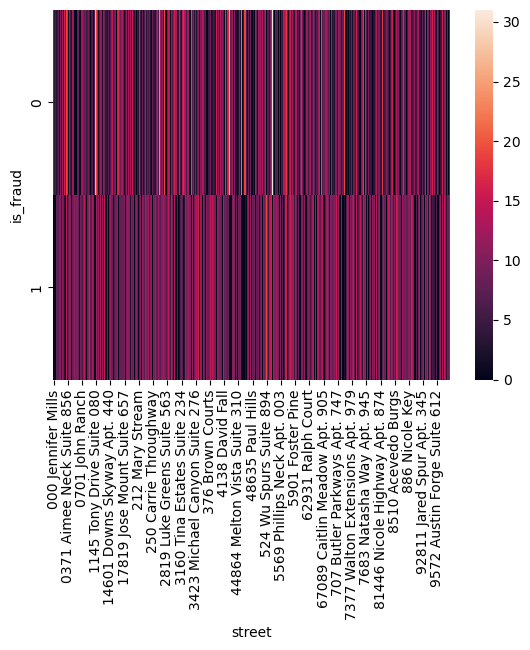

In [12]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['street']))

In [13]:
df.sample()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1135057,1135057,2020-04-18 03:59:42,30263540414123,fraud_Bradtke PLC,grocery_pos,313.59,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.72,-112.48,258,Geoscientist,1961-11-24,1a7246f828b67eebd29c1463758b26a9,1366257582,36.75,-112.91,1


## city vs is_fraud

In [14]:
pd.crosstab(df['is_fraud'], df['city'])

city,Achille,Acworth,Adams,Afton,Akron,Albany,Albuquerque,Alder,Aledo,Alexandria,Allenhurst,Allentown,Alpharetta,Altair,Alton,Altona,Altonah,Alva,Amanda,American Fork,Amorita,Amsterdam,Andrews,Angwin,Annapolis,Apison,Arcadia,Arlington,Armagh,Armonk,Arnold,Arvada,Ash Flat,Ashfield,Ashford,Ashland,Atglen,Athena,Atlantic,Auburn,Aurora,Avera,Avoca,Azusa,Bagley,Bailey,Ballwin,Barnard,Barneveld,Barnstable,Baroda,Basye,Baton Rouge,Battle Creek,Bauxite,Bay City,Bay Minette,Beacon,Beasley,Beaver Falls,Beaverdam,Belfast,Belgrade,Belle Fourche,Bellmore,Belmond,Belmont,Benton,Bessemer,Bethel,Bethel Springs,Big Creek,Big Indian,Bigelow,Birmingham,Blackville,Blairsden-Graeagle,Blairstown,Blooming Grove,Bolivar,Bolton,Bonfield,Bonita Springs,Boonton,Boulder,Bowdoin,Bowersville,Boyd,Bradley,Brainard,Brandon,Brantley,Brashear,Breesport,Bridgeport,Bridger,Brinson,Bristol,Bristow,Bronx,Brookfield,Brooklin,Brooklyn,Broomfield,Browning,Brownville,Bruce,Brunson,Bryant,Buellton,Burbank,Burke,Burlington,Burns Flat,Burrton,Byesville,Bynum,Cadiz,Camden,Campbell,Canton,Cape Coral,Cardwell,Carlisle,Carlotta,Carroll,Cascade Locks,Cass,Cassatt,Catawba,Cazenovia,Cecilton,Cedar,Center Point,Center Tuftonboro,Centerview,Central,Chatham,Chattanooga,Cherokee Village,Chester,Chester Heights,Christine,Churubusco,Cisco,Claremont,Clarinda,Clarion,Clarks Mills,Clarksville,Clay Center,Claypool,Clayton,Clearwater,Cleveland,Clifton,Clinton,Clune,Clutier,Cochranton,Coffeeville,Cokeburg,Coleharbor,Coleman,Collegeville,Collettsville,Colorado Springs,Colton,Columbia,Comfort,Comfrey,Conway,Cord,Corona,Corriganville,Corsica,Cottekill,Coulee Dam,Cowlesville,Coyle,Cranks,Creedmoor,Creola,Cressona,Cromona,Cross,Cross Plains,Crouse,Crownpoint,Curlew,Cuthbert,Cuyahoga Falls,Dadeville,Dallas,Dalton,Daly City,Damascus,Daniels,Darien,Dayton,De Lancey,De Queen,De Soto,De Witt,Deadwood,Deane,Delhi,Dell City,Deltona,Denham Springs,Des Moines,Desdemona,Detroit,Dexter,Diamond,Dieterich,Doe Hill,Dongola,Downey,Downsville,Drakes Branch,Dresden,Du Pont,Dublin,Dubre,Dumont,Duncan,Dunlevy,Eagarville,Early,East Andover,East Canaan,East China,East Rochester,East Troy,Easton,Edinburg,Edisto Island,Edmond,Egan,Ehrhardt,El Paso,Elberta,Eldridge,Elizabeth,Elizabethtown,Elk Rapids,Elkhart,Emmons,Emporium,Enola,Esbon,Espanola,Etlan,Eugene,Eureka,Fairhope,Fairview,Falconer,Falls Church,Falls City,Falmouth,Farmington,Fayetteville,Fenelton,Ferney,Fiddletown,Fields Landing,Florence,Ford,Fordoche,Fort Myers,Fort Washakie,Freedom,Freeport,Fullerton,Fulton,Gadsden,Gaines,Gainesville,Gaithersburg,Galatia,Gardiner,Garfield,Garrattsville,Georgetown,Gibsonville,Girard,Glade Spring,Glen Rock,Glendale,Goodrich,Goreville,Granbury,Grand Bay,Grand Junction,Grand Ridge,Grandview,Graniteville,Grant,Grantham,Grassflat,Great Mills,Greenbush,Greendale,Greenport,Greenview,Greenville,Greenwich,Greenwood,Gregory,Grenada,Grenola,Gretna,Grimesland,Grover,Hahira,Haines City,Halma,Halstad,Hampton,Hancock,Hannawa Falls,Harborcreek,Harmony,Harper,Harrington Park,Harrodsburg,Hartford,Harwood,Hatch,Haw River,Hawley,Hawthorne,Haynes,Hazel,Heart Butte,Hedley,Hedrick,Heidelberg,Heiskell,Heislerville,Helm,Henderson,Hewitt,Higganum,High Rolls Mountain Park,Highland,Hills,Hinckley,Hinesburg,Holcomb,Holliday,Holloway,Holstein,Honokaa,Hooper,Hopewell,Hopkins,Houston,Hovland,Howells,Howes Cave,Hubbell,Hudson,Humble,Humboldt,Huntington Beach,Huntsville,Hurley,Hurricane,Huslia,Iliff,Independence,Indian Wells,Indianapolis,Ironton,Irvine,Irvington,Irwinton,Isanti,Iselin,Issaquah,Jackson,Jaffrey,Jay,Jefferson,Jelm,Jermyn,Johns Island,Joliet,Jones,Jordan Valley,Jordanville,Juliette,June Lake,Kaktovik,Kansas City,Karnack,Karns City,Keisterville,Keller,Kenner,Kensington,Kent,Key West,Kilgore,Kings Bay,Kingsford Heights,Kingsport,Kingsville,Kirby,Kirk,Kirtland Afb,Kissee Mills,Kittery Point,Knowlesville,Knoxville,La Grande,Lagrange,Laguna Hills,Lahoma,Lake Jackson,Lake Oswego,Lakeland,Lakeport,Lakeview,Lamberton,Lamy,Lanark Village,Lane,Laramie,Lare

<Axes: xlabel='city', ylabel='is_fraud'>

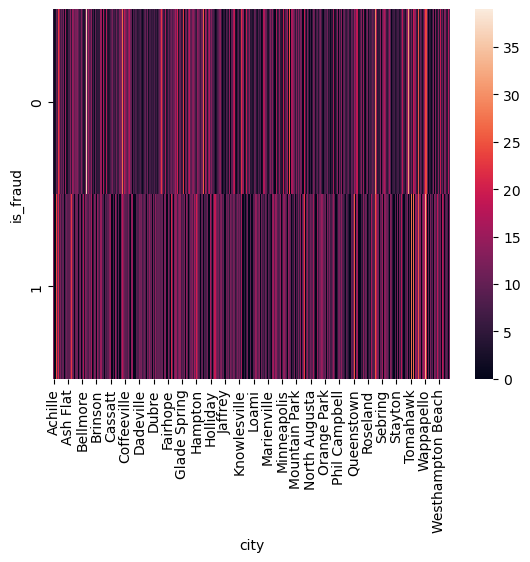

In [15]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['city']))

## state vs is_fraud

In [16]:
pd.crosstab(df['is_fraud'], df['state'])

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
is_fraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11,289,176,64,352,109,38,24,0,230,143,12,154,35,228,144,126,141,127,71,155,87,271,185,226,129,80,162,84,140,47,132,86,27,448,286,155,121,460,5,162,85,105,545,59,185,71,124,155,138,117
1,36,215,161,37,326,113,16,21,9,281,146,7,142,11,248,142,156,155,91,69,157,119,238,207,191,115,32,149,57,180,59,118,82,47,555,321,143,149,458,15,193,74,140,479,61,198,72,96,163,146,110


<Axes: xlabel='state', ylabel='is_fraud'>

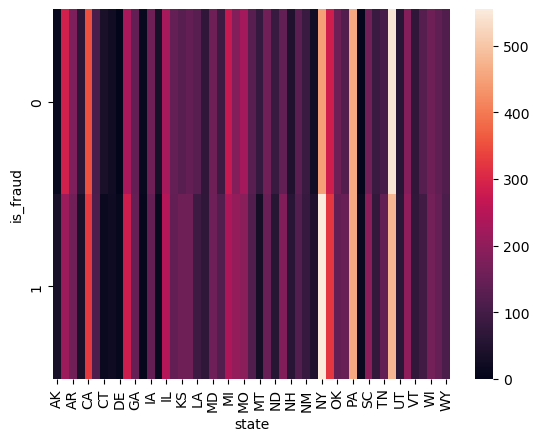

In [17]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['state']))

## city_pop vs is_fraud

<Axes: xlabel='is_fraud', ylabel='city_pop'>

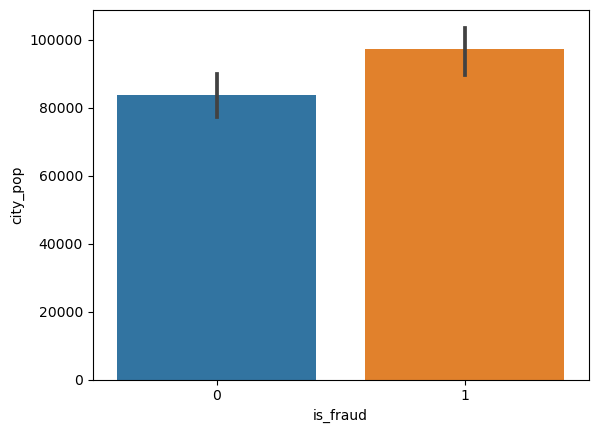

In [19]:
sns.barplot(x='is_fraud', y='city_pop', data=df)

<Axes: xlabel='is_fraud', ylabel='city_pop'>

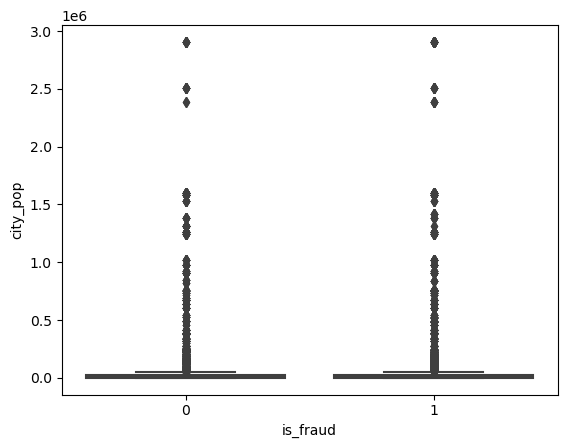

In [20]:
sns.boxplot(x='is_fraud', y='city_pop', data=df)

In [21]:
df.sample()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
174143,174143,2019-04-01 07:45:29,6544734391390261,fraud_Morar Inc,grocery_net,58.26,John,Myers,M,701 Wilson Divide,Highland,IN,46322,41.55,-87.46,23727,Community arts worker,1982-02-08,0720cf8d1794d51257f4e890b1ff4852,1333266329,41.40,-88.37,0


## job vs is_fraud

In [22]:
pd.crosstab(df['is_fraud'], df['job'])

job,Academic librarian,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education","Administrator, local government",Advertising account executive,Advertising account planner,Advertising copywriter,Advice worker,Aeronautical engineer,Agricultural consultant,Aid worker,Air broker,Air cabin crew,Air traffic controller,Airline pilot,Ambulance person,Amenity horticulturist,Analytical chemist,Animal nutritionist,Animal technologist,Animator,Applications developer,Arboriculturist,Archaeologist,Architect,Architectural technologist,Archivist,Armed forces logistics/support/administrative officer,Armed forces technical officer,Armed forces training and education officer,Art gallery manager,Art therapist,Artist,Arts development officer,Associate Professor,Audiological scientist,Barista,Barrister,Barrister's clerk,"Biochemist, clinical",Biomedical engineer,Biomedical scientist,Bookseller,Broadcast engineer,Broadcast journalist,Broadcast presenter,Building control surveyor,Building services engineer,Building surveyor,"Buyer, industrial",Cabin crew,Call centre manager,Camera operator,Careers adviser,Careers information officer,Cartographer,Catering manager,Ceramics designer,Charity fundraiser,Charity officer,Chartered accountant,Chartered legal executive (England and Wales),Chartered loss adjuster,Chartered public finance accountant,Chemical engineer,"Chemist, analytical",Chief Executive Officer,Chief Financial Officer,Chief Marketing Officer,Chief Operating Officer,Chief Strategy Officer,Chief Technology Officer,Chief of Staff,Child psychotherapist,Chiropodist,Civil Service administrator,Civil Service fast streamer,"Civil engineer, contracting",Claims inspector/assessor,Clinical biochemist,Clinical cytogeneticist,Clinical psychologist,Clinical research associate,Clothing/textile technologist,Colour technologist,Commercial horticulturist,Commercial/residential surveyor,Commissioning editor,Communications engineer,Community arts worker,Community development worker,Community education officer,Community pharmacist,Company secretary,Comptroller,"Conservation officer, historic buildings","Conservator, furniture","Conservator, museum/gallery",Contracting civil engineer,Contractor,Control and instrumentation engineer,Copy,"Copywriter, advertising",Corporate investment banker,Counselling psychologist,Counsellor,Curator,Cytogeneticist,Dance movement psychotherapist,Dancer,Data scientist,Database administrator,Dealer,"Designer, ceramics/pottery","Designer, exhibition/display","Designer, furniture","Designer, industrial/product","Designer, interior/spatial","Designer, jewellery","Designer, multimedia","Designer, television/film set","Designer, textile","Development worker, community","Development worker, international aid",Diagnostic radiographer,Dispensing optician,"Doctor, general practice","Doctor, hospital",Drilling engineer,Early years teacher,Ecologist,Economist,"Editor, commissioning","Editor, film/video","Editor, magazine features",Education administrator,"Education officer, community","Education officer, museum",Educational psychologist,Electrical engineer,Electronics engineer,"Embryologist, clinical",Emergency planning/management officer,Energy engineer,Energy manager,"Engineer, aeronautical","Engineer, agricultural","Engineer, automotive","Engineer, biomedical","Engineer, broadcasting (operations)","Engineer, building services","Engineer, civil (consulting)","Engineer, civil (contracting)","Engineer, communications","Engineer, control and instrumentation","Engineer, drilling","Engineer, electronics","Engineer, land","Engineer, maintenance","Engineer, manufacturing","Engineer, materials","Engineer, mining","Engineer, petroleum","Engineer, production","Engineer, site","Engineer, structural","Engineer, technical sales",Engineering geologist,English as a foreig

<Axes: xlabel='job', ylabel='is_fraud'>

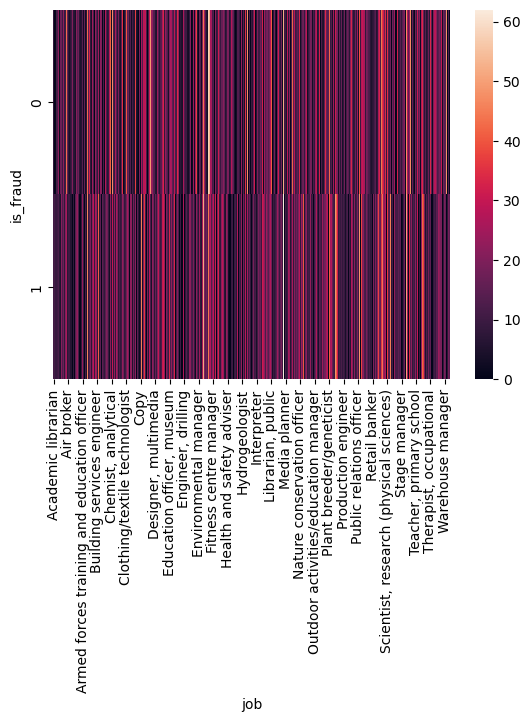

In [23]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['job']))

## dob vs is_fruad

In [26]:
pd.crosstab(df['is_fraud'], df['dob'].dt.year)

dob,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2003,2004,2005
is_fraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5,0,30,25,28,36,21,24,12,16,20,35,36,14,14,44,42,31,49,13,37,71,43,19,61,53,57,59,65,72,103,113,104,82,91,91,87,99,120,85,96,107,154,149,97,112,133,173,287,210,204,177,218,144,183,89,165,127,115,133,236,216,185,194,171,126,182,146,77,161,92,109,33,153,82,117,53,29,21,33,10
1,0,11,25,47,41,43,23,31,41,22,54,35,40,47,32,73,88,83,63,39,16,60,58,29,61,83,57,45,70,60,98,89,130,126,112,68,145,177,155,135,150,107,139,168,136,124,175,131,195,109,183,104,178,95,115,86,114,114,94,110,134,117,181,168,117,117,182,156,90,164,79,145,96,164,86,96,57,58,21,32,7


<Axes: xlabel='dob', ylabel='is_fraud'>

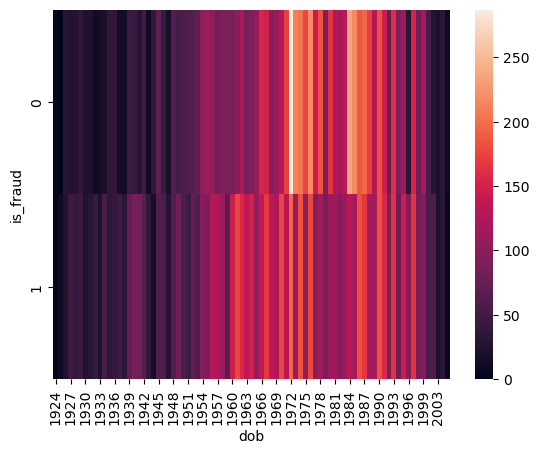

In [27]:
sns.heatmap(pd.crosstab(df['is_fraud'], df['dob'].dt.year))